In [1]:
#목적 : X값에 대한 DTI구하기
#과제 : csv를 bigQuery에서 가져오기!!!
# 강력한 마지막 한줄이 있다고 하셨음 그게 뭔지 알려달라고 하기 
#데이터 캐글에서 제공하는 무료 데이터임
# 배추값의 경우 인턴셋이 다 같이 했었던것을 좀 더 깊이 배우고 넘어갔다

#데이터 분석 라이브러리
import pandas as pd

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic')
%matplotlib inline

In [2]:
#데이터 불러오기 방법 1
#df = pd.read_csv("./data/bank_loan_data_new.csv")

#BigQuery에서 불러오기
from google.cloud import bigquery
client = bigquery.Client()
query = """
SELECT *  FROM `sixth-tempo-323301.bankloan_dataset.bankloan`
"""
df = client.query(query).to_dataframe()

df.head(3)

,CUSTOMER_ID,LOAN_YEAR,LOAN_DT,WORK_TERM,HOME_OWNERSHIP,INCOME_LEVEL,YEAR_INCOME,LOAN_AMOUNT,LOAN_TERM,LOAN_METHOD,...,LOAN_STATUS,LOAN_RATE,CUSTOMER_LEVEL,DTI,LAST_PAYMENT,TOTAL_RECV_PRINCIPAL,RECV_LOAN,INSTALLMENT_PAYMENT,AREA,CUSTOMER_GRADE
0,231321,2008,2008-01-01,5.0,NONE,Low,22200,10000,36 months,INDIVIDUAL,...,Good Loan,7.75,A,52.03,11239.56,9999.99,0.0,312.22,leinster,E
1,79893,2007,2007-01-07,0.5,NONE,Low,75027,6700,36 months,INDIVIDUAL,...,Good Loan,7.75,A,10.31,7530.42,6700.00,0.0,209.18,Northern-Irl,B
2,79924,2007,2007-01-08,0.5,NONE,Low,75027,7000,36 months,INDIVIDUAL,...,Good Loan,7.75,A,10.78,7867.53,7000.00,0.0,218.55,Northern-Irl,B


In [3]:
# EDA 첫번째 과정 : 결과값 갯수, data type, 결측치 확인 -- 내가 불러온 데이터가 어떻게 생겼는지, 해당 데이터가 제대로 넘어왔는지 확인
df.info() 
# 해당 데이터를 바로 쓰기 위해 csv파일로 저장하기 : bigQuery로 계속 끌어다쓰면 비용이 많이 들기 때문
df.to_csv("./data/bankloan_dataset_local.csv")


#전체 컬럼
#dtype: object : String이라는 뜻
#non-null = 결측값이 없음
#float : 숫자형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887377 entries, 0 to 887376
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   CUSTOMER_ID           887377 non-null  int64  
 1   LOAN_YEAR             887377 non-null  int64  
 2   LOAN_DT               887377 non-null  object 
 3   WORK_TERM             887377 non-null  float64
 4   HOME_OWNERSHIP        887377 non-null  object 
 5   INCOME_LEVEL          887377 non-null  object 
 6   YEAR_INCOME           887377 non-null  int64  
 7   LOAN_AMOUNT           887377 non-null  int64  
 8   LOAN_TERM             887377 non-null  object 
 9   LOAN_METHOD           887377 non-null  object 
 10  LOAN_PURPOSE          887377 non-null  object 
 11  INTEREST_LEVEL        887377 non-null  object 
 12  LOAN_STATUS           887377 non-null  object 
 13  LOAN_RATE             887377 non-null  float64
 14  CUSTOMER_LEVEL        887377 non-null  object 
 15  

In [4]:
df.describe()
#count : 개수
#mean : 평균
#std : 표준편차
#min : 최솟값
#25% : 제 1사분위 값
#50% : 중앙값, 중앙값
#75% : 제 3사분위 값
#max : 최댓값 

,CUSTOMER_ID,LOAN_YEAR,WORK_TERM,YEAR_INCOME,LOAN_AMOUNT,LOAN_RATE,DTI,LAST_PAYMENT,TOTAL_RECV_PRINCIPAL,RECV_LOAN,INSTALLMENT_PAYMENT
count,8.873770e+05,887377.000000,887377.000000,8.873770e+05,887377.000000,887377.000000,887377.000000,887377.000000,887377.000000,887377.000000,887377.000000
mean,3.246506e+07,2014.021759,6.050564,7.502776e+04,14755.271153,13.246736,28.286554,7558.842664,5757.718723,45.919347,436.717169
std,2.282731e+07,1.261742,3.507409,6.469813e+04,8435.455106,4.381870,15.060962,7871.245001,6625.443444,409.694330,244.186467
min,5.473400e+04,2007.000000,0.500000,1.200000e+03,500.000000,5.320000,0.040000,0.000000,0.000000,0.000000,15.670000
25%,9.206640e+06,2013.000000,3.000000,4.500000e+04,8000.000000,9.990000,16.530000,1914.590000,1200.570000,0.000000,260.710000
50%,3.443325e+07,2014.000000,6.050000,6.500000e+04,13000.000000,12.990000,26.160000,4895.000000,3215.320000,0.000000,382.550000
75%,5.490813e+07,2015.000000,10.000000,9.000000e+04,20000.000000,16.200000,38.500000,10616.818460,8000.000000,0.000000,572.600000
max,6.861706e+07,2015.000000,10.000000,9.500000e+06,35000.000000,28.990000,1399.800000,57777.579870,35000.030000,33520.270000,1445.460000


In [5]:
df.describe(include = "O")
#그룹별로 출력

,LOAN_DT,HOME_OWNERSHIP,INCOME_LEVEL,LOAN_TERM,LOAN_METHOD,LOAN_PURPOSE,INTEREST_LEVEL,LOAN_STATUS,CUSTOMER_LEVEL,AREA,CUSTOMER_GRADE
count,887377,887377,887377,887377,887377,887377,887377,887377,887377,887377,887377
unique,103,6,3,2,2,14,2,2,7,5,5
top,2015-01-10,MORTGAGE,Low,36 months,INDIVIDUAL,debt_consolidation,Low,Good Loan,B,leinster,E
freq,48631,443555,729614,621123,886868,524214,465315,819948,254535,214646,354855


In [6]:
#컬럼의 유일값(변수)들 출력
print(df['HOME_OWNERSHIP'].unique())
print(df['INCOME_LEVEL'].unique())
print(df['LOAN_TERM'].unique())
print(df['LOAN_METHOD'].unique())
print(df['INTEREST_LEVEL'].unique())
print(df['LOAN_STATUS'].unique())
print(df['CUSTOMER_GRADE'].unique())
print(df['AREA'].unique())

['NONE' 'OTHER' 'ANY' 'OWN' 'RENT' 'MORTGAGE']
['Low' 'Medium' 'High']
[' 36 months' ' 60 months']
['INDIVIDUAL' 'JOINT']
['Low' 'High']
['Good Loan' 'Bad Loan']
['E' 'B' 'A' 'D' 'C']
['leinster' 'Northern-Irl' 'munster' 'cannught' 'ulster']


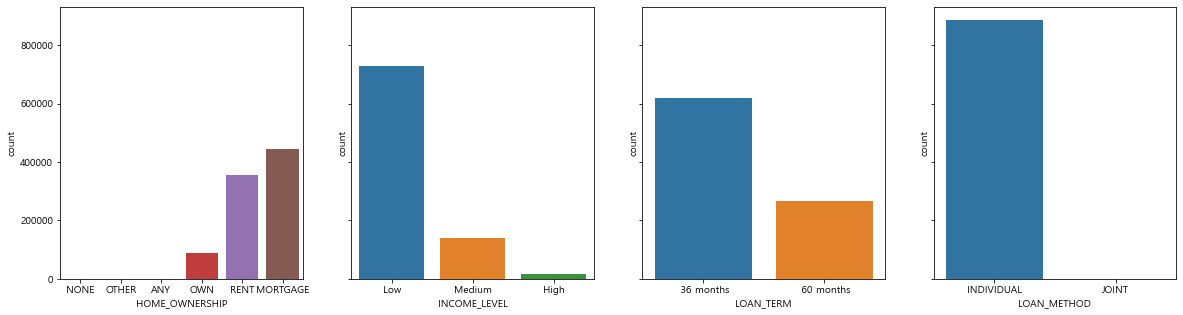

In [7]:
#데이터 시각화 시작
fig, axes = plt.subplots(1, 4, figsize=(20,5), sharey=True)
sns.countplot(x='HOME_OWNERSHIP', data=df, ax=axes[0])
sns.countplot(x='INCOME_LEVEL', data=df, ax=axes[1])
sns.countplot(x='LOAN_TERM', data=df, ax=axes[2])
sns.countplot(x='LOAN_METHOD', data=df, ax=axes[3])
plt.show()

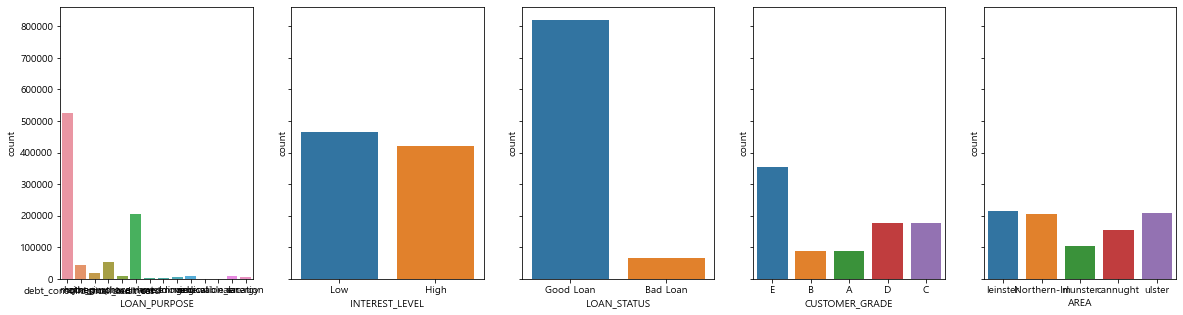

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(20,5), sharey=True)
sns.countplot(x='LOAN_PURPOSE', data=df, ax=axes[0])
sns.countplot(x='INTEREST_LEVEL', data=df, ax=axes[1])
sns.countplot(x='LOAN_STATUS', data=df, ax=axes[2])
sns.countplot(x='CUSTOMER_GRADE', data=df, ax=axes[3])
sns.countplot(x='AREA', data=df, ax=axes[4])
plt.show()

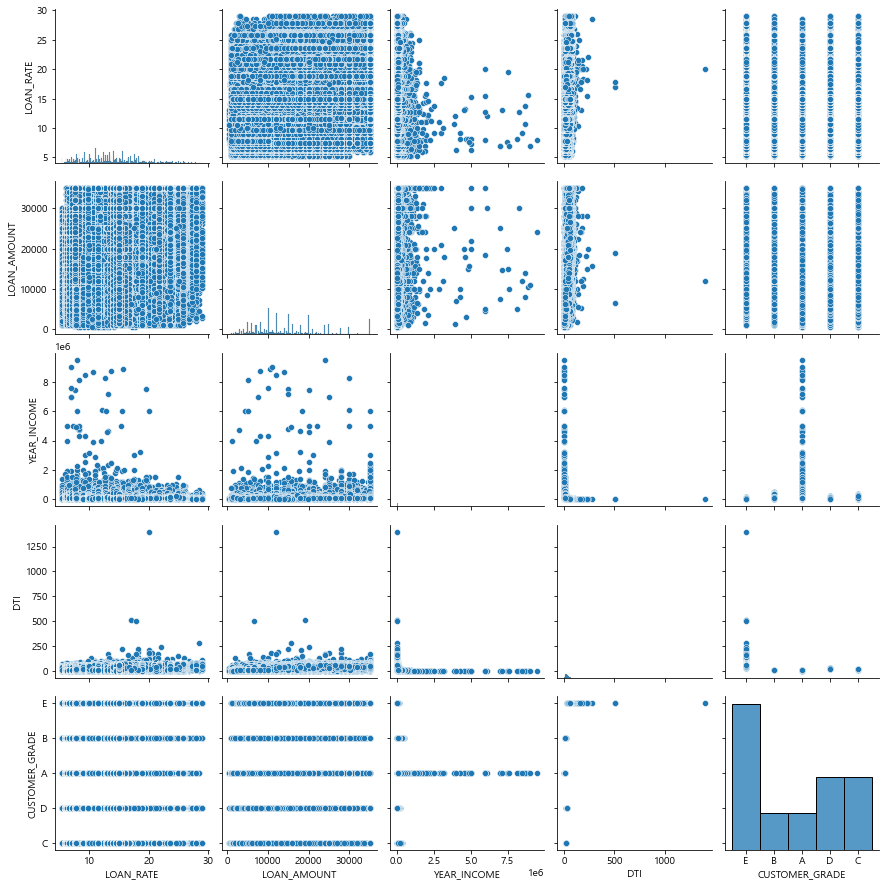

In [11]:
#scatter graph 
#산점도 , histogram graph?
sns.pairplot(data=df, vars=['LOAN_RATE', 'LOAN_AMOUNT', 'YEAR_INCOME', 'DTI', 'CUSTOMER_GRADE'])
plt.show()

In [12]:
#DTI 구하기 >> DTI를 기준으로 뽑을 수 있는 features다. 
# Featrue : WORK_TERM, YEAR_INCOME, HOME_OWNERSHIP

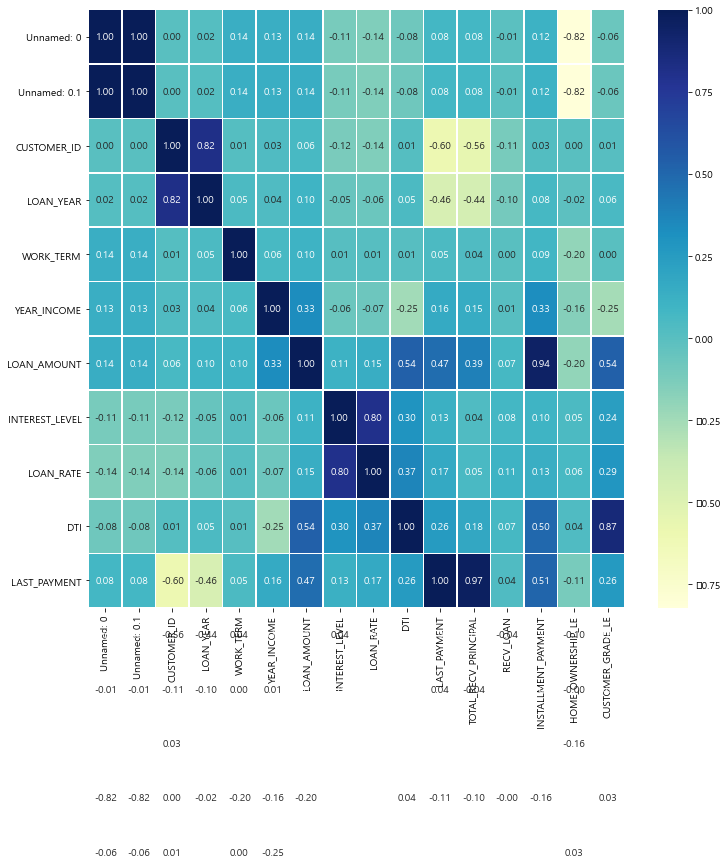

In [14]:
#상관계수
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./data/bankloan_dataset_prep.csv")
plt.figure(figsize=(12,11))
ax = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, cmap='YlGnBu')
# print(ax.get_ylim())
ax.set_ylim(11,0)
plt.show()